<div style="border:solid Chocolate 2px; padding: 40px">

<b>Елена, привет!👋</b>

Меня зовут Арина У., я буду ревьюером твоего проекта. Надеюсь, тебе будет удобно, если если мы будем общаться "ты". Но, если это не удобно, обязательно скажи об этом😏 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
from scipy import stats as st
import matplotlib.pyplot as plt 

* [Приоритизация гипотез.](#Приоритизация)
   * [Приоритизации гипотез по фреймоворку ICE](#айс)
   * [Приоритизации гипотез по фреймоворку RICE](#райс) 
* [Анализ A/B-теста](#анализ)
  * [График кумулятивной выручки по группам](#кум_груп)
  * [График кумулятивного среднего чека по группам](#кум_чек)
  * [График относительного изменения кумулятивной конверсии группы B к группе A](#б_а)
  * [График кумулятивной конверсии по группам](#кум_конв)
  * [Точечный график количества заказов по пользователям](#кол_зак)
  * [Точечный график стоимостей заказов](#стоим)
  * [Статистическая значимость различий в конверсии между группами по «сырым» данным. ](#сырой_конв)
  * [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным ](#сырой_чек)
  * [Статистическая значимость  различий в конверсии между группами по «очищенным» данным](#чис_конв)
  * [Статистическая значимость  различий в среднем чеке заказа между группами по «очищенным» данным ](#чис_чек)
* [Вывод](#вывод) 

In [2]:
hypothesis = pd.read_csv("https://code.s3.yandex.net/datasets/hypothesis.csv")
hypothesis.columns =hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
orders = pd.read_csv("https://code.s3.yandex.net/datasets/orders.csv")
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [4]:
visitors = pd.read_csv("https://code.s3.yandex.net/datasets/visitors.csv")
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [6]:
dataset = {
    'hypothesis': hypothesis,
    'orders': orders,
    'visitors': visitors
}

for x, y in dataset.items():
    print(f'{x}', (list(y.shape)))
    print(f'{x}: {y.isnull().any().any()}')
    

hypothesis [9, 5]
hypothesis: False
orders [1197, 5]
orders: False
visitors [62, 3]
visitors: False


In [7]:
display("visitors:", visitors.duplicated().any(), visitors.isnull().any().any(), visitors.info())
print()
display("hypothesis:",hypothesis.duplicated().any(), hypothesis.isnull().any().any(), hypothesis.info())
print()
display("orders:", orders.duplicated().any(), orders.isnull().any().any(), orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


'visitors:'

False

False

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


'hypothesis:'

False

False

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


'orders:'

False

False

None

In [8]:
visitors_orders = pd.merge(visitors, orders, on = 'group')
visitors_orders.isna().sum()

date_x           0
group            0
visitors         0
transactionId    0
visitorId        0
date_y           0
revenue          0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Елена, хорошая работа! Ты произвела основные действия по предобработке данных, все получилось! 


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    
Также можно проверить корректность разбиения пользователей на группы - может быть есть пользователи, попавшие в обе группы? Если таковые пользователи есть, нужно их выявить и выработать стратегию работы с такими данными. Пересечение групп сильно влияет на результаты теста, если процент достаточно большой. Если есть возможность их можно удалить и посмотреть, какие результаты получаются без них, в любом случае к результатам теста придется относится осторожно.

# Приоритизация гипотез.<a id="Приоритизация"></a> 

# Приоритизации гипотез по фреймоворку ICE <a id="айс"></a> 

# Приоритизации гипотез по фреймоворку RICE <a id="райс"></a>

In [9]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(2)
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2


- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
- Efforts — сколько стоит протестировать эту гипотезу.

Видим, что самый высокие Impact у гипотез под номером 0 и 8 и самый высокий Confidence у номеров 0 и 8 (также у номеров 6 и 7). Их efforts в то же время держатся на среднем уровне. Заранее можно сделать предолжение, что ICE для 0 и 8 гиротез будут одними из самыз высоких. В то же время impact, confidence и reach на высоком уровне для 7-ой гипотезы и его efforts не превышают нормы. Его RICE вероятно будет одним из самых выоских.

In [10]:
hypothesis_sorted = pd.DataFrame()
hypothesis_sorted['hypothesis'] = hypothesis['hypothesis']
hypothesis_sorted['ICE'] = hypothesis['ICE']
hypothesis_sorted['RICE'] = hypothesis['RICE']
display(hypothesis_sorted.sort_values(by='ICE', ascending = False))

,hypothesis,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20,16.2
0,"Добавить два новых канала привлечения трафика,...",13.33,40.0
7,Добавить форму подписки на все основные страни...,11.20,112.0
6,Показать на главной странице баннеры с актуаль...,8.00,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00,56.0
1,"Запустить собственную службу доставки, что сок...",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.33,4.0
3,"Изменить структура категорий, что увеличит кон...",1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00,3.0


Наиболее перспективные гипотезы по ICE - 8, 0 и 7, как и предполашалось выше. 

In [11]:
display(hypothesis_sorted.sort_values(by='RICE', ascending = False))

,hypothesis,ICE,RICE
7,Добавить форму подписки на все основные страни...,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",13.33,40.0
6,Показать на главной странице баннеры с актуаль...,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00,3.0


Наиболее перспективные гипотезы по методу RICE - 7, 2 и 0.
Видим, что самые неприоритетные гипотезы, что по методу ICE, так и по методу RICE имеют худшие показатели по обоим методам, в то время как самая приоритетная из гипотез по методу ICE (гипотеза номер 8) спустились на пятое место и ее RICE равен меньше 20% от RICE 7-ой гипотезы. Пятая же по приоритетности гипотеза по методу ICE (гипотеза номер 2), поднялась на второе место по приоритетности по методу RICE. 
Мы наблюдаем такие изменения, потому что метода RICE так же учитывает фактор reach -  скольких пользователей затронет изменение, которое мы хотим внести. Соотвественно, хоть гипотеза 8 - самая приоритетная по методу ICE, она затронет намного меньше пользователей, чем вторая по приоритету гипотза 0 или третья по приоритету гипотеза номер 7.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
В целом ты корректно применила фреймворки и проинтерпретировала результаты, так держать!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
И еще несколько рекомендаций:
        
* гипотезы имеют длинные названия, чтобы они полностью отображались  можно использовать <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html">опции pandas</a> Кроме того, лучше не использовать `print()` c датафреймами в Jupyter Notebook, ты можешь вызы
        
* результаты можно было бы объединить в единой таблице для наглядности. Также их можно было бы проранжировать и выделить цветом — https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

* в качестве визуализации изменения приоритетов можно использовать <a href="https://datayoga.ru/tpost/zh3s62fori-sloupgraf">slope graph</a>, <a href="https://chart-studio.plotly.com/~pcchang/224/slopegraph-spending-and-academic-performance-by-states-doc/#/">реализация на plotly</a>
        
И еще несколько ссылок для ознакомления с тем, как строить такоеи графики:
        
<a href="https://towardsdatascience.com/slope-charts-with-pythons-matplotlib-2c3456c137b8">раз</a>        
      
<a href="https://cduvallet.github.io/posts/2018/03/slopegraphs-in-python">два</a>     

      
<a href="https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib">три</a>     

* отчёте есть формулы для расчёта приоритезации, почему бы их не оформить, для этого есть микропакет для вёрстки `LaTex` - <a href="https://www.youtube.com/watch?v=vSc25kdgecg">Использование LaTex в Jupyter Notebook</a>
<br><a href="https://www.overleaf.com/static/latex/learn/free-online-introduction-to-latex-part-1.pdf">LaTex for beginners</a>. Вот так будут выглядеть формулы:👇
</ul></div> <br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

<hr style="border: 2px solid yellow;" />

# Анализ A/B-теста <a id="анализ"></a>

In [12]:
datesGroups = orders[['date','group']].drop_duplicates() 
#orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
                                                     ].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = [
    'date', 
    'group', 
    'orders', 
    'buyers', 
    'revenue', 
    'visitors'
]

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


# График кумулятивной выручки по группам <a id="кум_груп"></a>

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


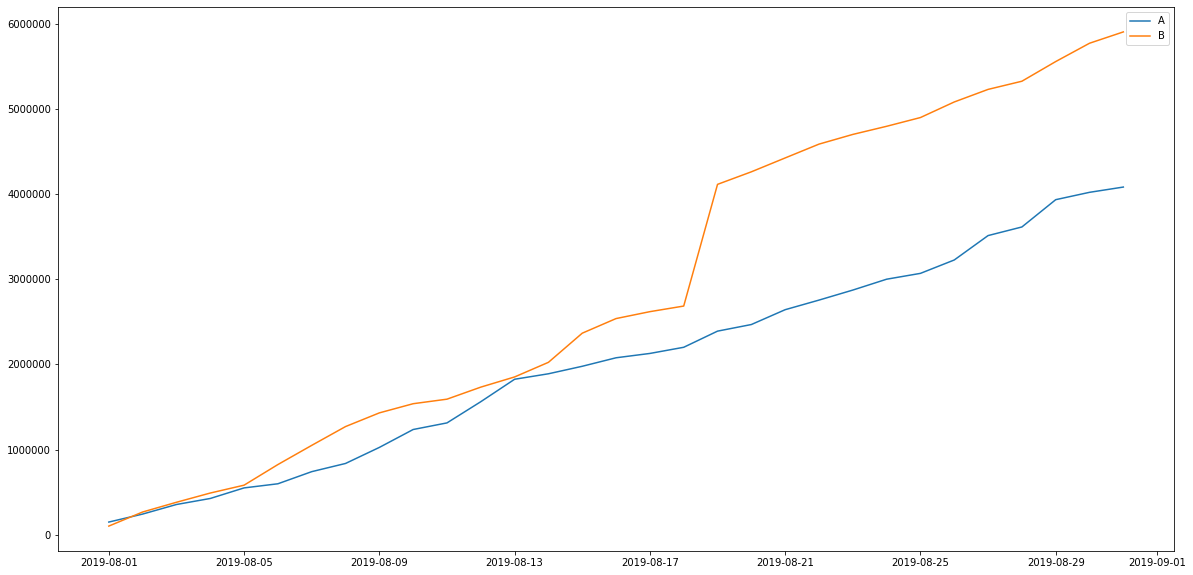

In [13]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig = plt.figure(figsize=(20,10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки группы В в нескольких точках резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

# График кумулятивного среднего чека по группам <a id="кум_чек"></a>

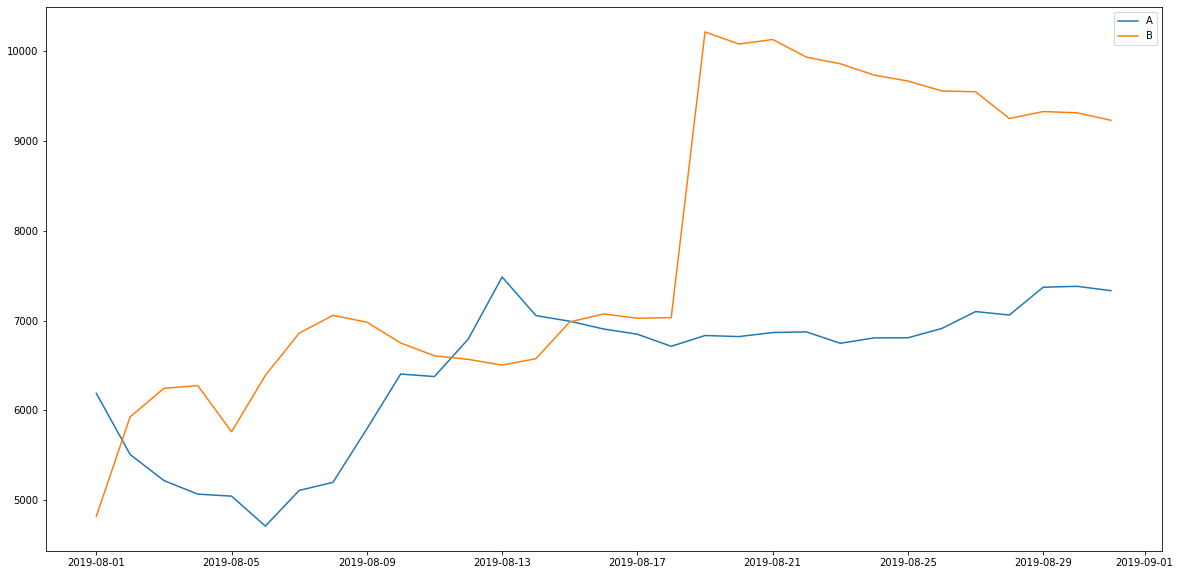

In [14]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
fig = plt.figure(figsize=(20,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Средний чек тоже становится равномерным ближе к концу теста для группы А, для группы В чек остается нестабильным до конца графика.Возможно, в группу А во второй половине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне. Давать показания рано, для начала требутся доп ангализ выбросов. 

# График относительного изменения кумулятивной конверсии группы B к группе A  <a id="б_а"></a>

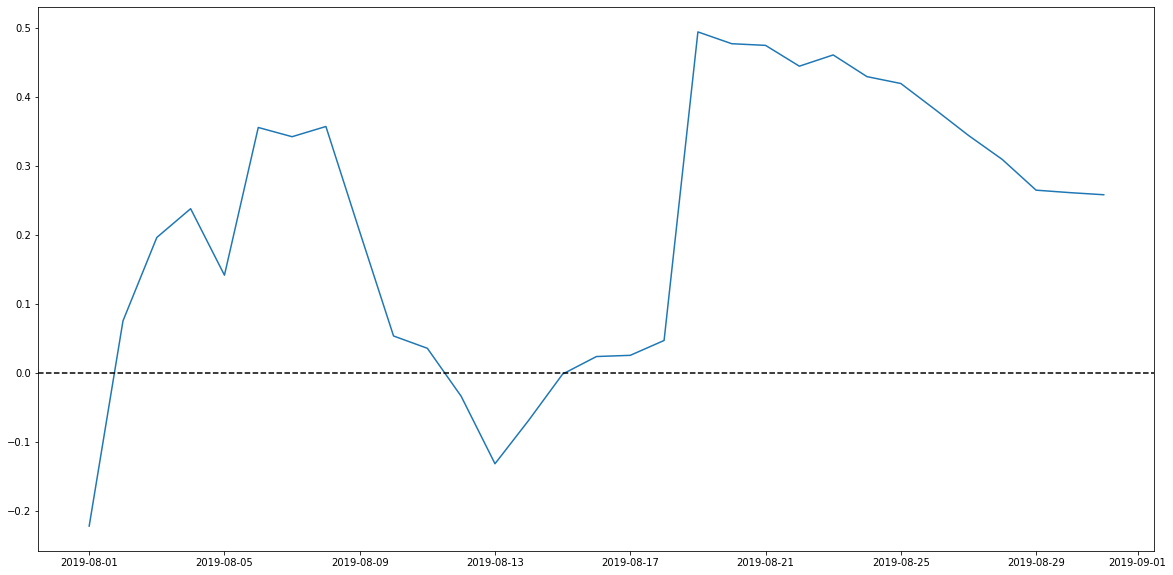

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig = plt.figure(figsize=(20,10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline( y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет».Видимо, именно тогда были совершены аномальные заказы.

# График кумулятивной конверсии по группам <a id="кум_конв"></a>

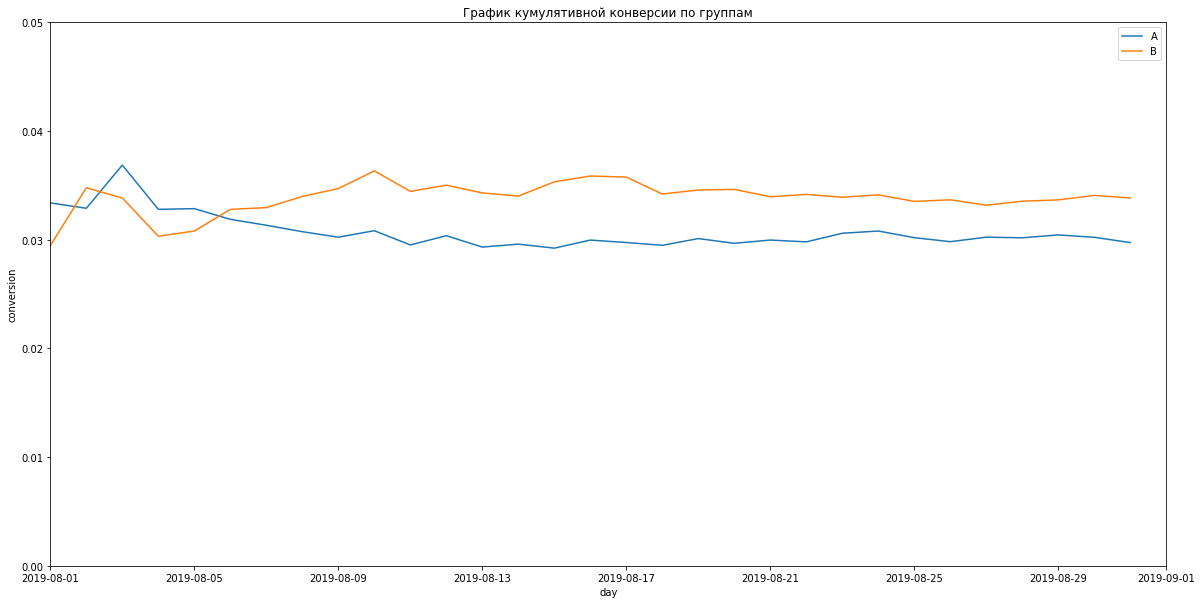

In [37]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig = plt.figure(figsize=(20,10))
plt.title('График кумулятивной конверсии по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('day')
plt.ylabel('conversion')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0,  0.05]);

В начале сегмента А был выше по показателям, но к концу графика сегмент В выровнялся и зафиксировался в области оодного значения, выше сегмента А

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
На этом этапе графики выглядят корректными, ты справилась с этим шагом проекта, согласна с твоими выводами!


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
        
Короткая рекомендация по оформлению визуализации: в графиках выше (и ниже) у тебя присутствуют технические строчки типа `<matplotlib.lines.Line2D at 0x7f5183944e90>` при выводе графиков. Их можно убрать, применив `plt.show()` или `;` Также стоит добавить заголовки к графикам и подписи к осям, это увеличит информативность визуализации.

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
 
Ок, вижу, что ты немного скорректировала графики. В следующий раз стоит все-таки добавлять заголовки и подписи к осям.

# Анализ выбросов и всплесков: крайние значения данных


In [17]:
print(' orders revenue max {1}\n orders revenue min {2}'.format(orders.revenue.mean(), orders.revenue.max(), orders.revenue.min()))

 orders revenue max 1294500
 orders revenue min 50


In [18]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


# Точечный график количества заказов по пользователям <a id="кол_зак"></a>

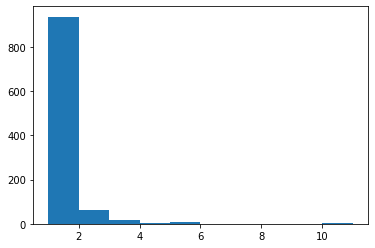

In [19]:
plt.hist(ordersByUsers['orders']);

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.
Построим точечную диаграмму числа заказов на одного пользователя:

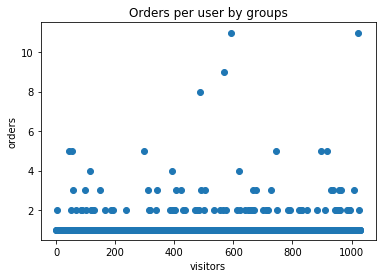

In [39]:
plt.xlabel('visitors')
plt.ylabel('orders')
plt.title('Orders per user by groups')
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

Выводы подтверждаются: много пользователей с 1-2 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [21]:
print(np.percentile(ordersByUsers['orders'], [95,99])) 

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз.

# Точечный график стоимостей заказов <a id="стоим"></a>

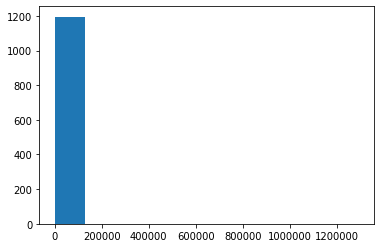

In [22]:
plt.hist(orders['revenue']);

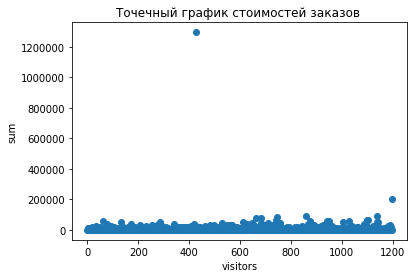

In [43]:
plt.xlabel('visitors')
plt.ylabel('sum')
plt.title('Точечный график стоимостей заказов ')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Наблюдается выброс в размере более, чем на 1 млн рублей.

In [24]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей купили больше, чем на 28  тыс рублей. И только 1% купил свыше, чем 58,2 тыс рублей

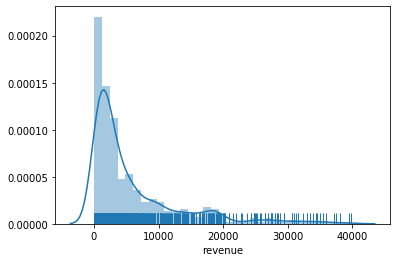

In [25]:
import seaborn as sns
orders = orders.rename(columns = {'visitorId' : 'userId'})
orders_and_ordersbyuser = orders.merge(ordersByUsers,on = 'userId')
df_new = orders_and_ordersbyuser[(orders_and_ordersbyuser['revenue'] < 40000) & (orders_and_ordersbyuser['orders'] < 4 )]
sns.distplot(df_new['revenue'], rug=True, norm_hist=True);
#Эти данные в предеоах 1% от заказоы и 5% от суммы

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
В целом, границы выбросов определены верно!


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
        
Один момент: если ты все же обнаружишь пользователей, попавших в обе группы и попробуешь их удалить, границы выбросов могут измениться.

# Анализ A/B-теста 

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [27]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

# Статистическая значимость различий в конверсии между группами по «сырым» данным  <a id="сырой_конв"></a>

Посчитаем статистическую значимость различия в конверсии между группами.

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("pvalue = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы В к групе А равен = {0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))

pvalue = 0.008
Относительный прирост конверсии группы В к групе А равен = 13.808%


Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу отвергаем. Относительный прирост конверсии группы В к групе А равен 13%

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:


# Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным <a id="сырой_чек"></a>

In [29]:
print('pvalue = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие между чеками А и В = {0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

pvalue = 0.365
Различие между чеками А и В = 25.871%


P-value = 0.364, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Различие между чеками А и В - 26%. Средний чек группы B значительно выше среднего чека группы A.

# Статистическая значимость  различий в конверсии между группами по «очищенным» данным <a id="чис_конв"></a>

Найденные выше 95-й и 99-й перцентили средних чеков равны 35 485 и 58 233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 35000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
Name: userId, dtype: int64
(53,)


Всего 53 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста

# Статистическая значимость  различий в среднем чеке заказа между группами по «очищенным» данным <a id="чис_чек"></a>

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [32]:
print('pvalue = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительно')
print("pvalue = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print()
print('Относительный прирост конверсии группы В к групе А равен = {0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
print('относительно')
print("Относительный прирост конверсии группы В к групе А равен = {0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

pvalue = 0.005
относительно
pvalue = 0.008

Относительный прирост конверсии группы В к групе А равен = 17.9%
относительно
Относительный прирост конверсии группы В к групе А равен = 13.8%


Результаты по конверсии практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?

Формулируем нулевую гипотезу (H0):
* существует статистическая разница между средним чеком по "сырым" данным и "отчищенным" данным

Формулируем апльтернативную гипотезу (H1):
* разницы между средним чеком по "сырым" данным и "отчищенным" данным не существует

In [33]:
print(
    'pvalue = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
         alternative='two-sided')[1]
    )
)

print('относительно')
print('pvalue = {:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print()
print(
    "Различие между чеками А и В по очищенным данным = {0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 
print('относительно')
print('Различие между чеками А и В по сырым данным = {:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

pvalue = 0.885
относительно
pvalue = 0.365

Различие между чеками А и В по очищенным данным = 2.2%
относительно
Различие между чеками А и В по сырым данным = 25.9%


P-value уменьшился, а разница между сегментами уменьшилас с 26% до 2%
Хотя общие выводы по результатам теста не изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста

Значения p-value до 0,05 считаются незначительными, а в нашем случае оно равно = 0.885. Что означает, нулевая гипотеза подтверждена — статистическая разница между средним чеком по "сырым" данным и "отчищенным" данным сшуществует.

Имеющиеся факты:
- Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B хуже группы A и нет значительной тенденции к улучшению

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Что на этом шаге сделано корректно:
    
* ты верно выбрала сам тест и верно проинтерпретировала его результаты, за это плюс;
    
* проверила все требуемые пары гипотез 


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Что нужно доработать на этом шаге:
   
* есть особенность в реализации теста Манна-Уитни <code>stats.mannwhitneyu</code>, тест имеет параметр <code>alternative</code>, по-умолчанию, он принимает значение <code>None</code> для совместимости, но в таком случае тест выполняет проверку похожую на одностороннюю, что не корректно для нашего теста. Для получения правильных результатов нужно использовать <code>alternative="two-sided"</code>
* важно формулировать гипотезы перед проверками (в случае всех тестов), поэтому, пожалуйста, сформулируй `альтернативную` и `нулевую` гипотезы 
* разницу в конверсии можно выразить в процентах: для этого здесь `3f` можно использовать знак процента.

<div class="alert alert-success">
<h2> Комментарий Лены <a class="tocSkip"> </h2>

    
сделала:
    
* я добавила alternative="two-sided" только для отчищенныъ данных, но не поняла, почему такого не было в практикуме - ситуация буквально одтна и та же 
    
* добавила нулевую гипотезу, но что именно покащывает снижение pvalue в этом случае? Что мы подтвердили гипотезу в для чистых данных и опровергли для сырых?

<div class="alert alert-warning">
    <h2> Комментарий ревьюера: вторая итерация ревью<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Отвечая на твои вопросы:
        
* ревью для того и есть, чтобы дать немного больше, чем дает теория в тренажере😉, это чуть более углубленный уровень. Вообще в проверке гипотез очень много подводных камней и нюансов, в тренажере дается базовая теория, но на самом деле тонкостей хватает
        
Подробнее про проблему выбора теста (одностороннего или двустороннего ты можешь почитать по ссылкам ниже:
        
`A two-tailed test is appropriate if you want to determine if there is any difference between the groups you are comparing. For instance, if you want to see if Group A scored higher or lower than Group B, then you would want to use a two-tailed test. This is because a two-tailed test uses both the positive and negative tails of the distribution. In other words, it tests for the possibility of positive or negative differences.`

`A one-tailed test is appropriate if you only want to determine if there is a difference between groups in a specific direction. So, if you are only interested in determining if Group A scored higher than Group B, and you are completely uninterested in possibility of Group A scoring lower than Group B, then you may want to use a one-tailed test.`
    
Источник: https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/#:~:text=This%20is%20because%20a%20two,groups%20in%20a%20specific%20direction.
    
И еще несколько ссылок по этому вопросу:
    
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html
    
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/
    
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/
        
* во-первых, в статистике невозможно "подтвердить" гипотезу, можно либо обнаружить статистически значимые различия, т.е. принять альтернативную гипотезу и таким образом опровергнуть нулевую гипотезу, или наоборот; во-вторых, ты проверяешь гипотезы (нулевую и альтернативную) в каждом случае, как на сырых, так и на очищенных данных. Т.е. в каждом из случаев важно формулировать нулевую и альтернативную гипотезы и в каждом случае (сырые и очищенные данные) ты будешь либо принимать альтернативную гипотезу и отвергать нулевую или наоборот.
        
Пример:
`Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.`
        
`H0 - "Средний чек заказа в группе А равен среднему чеку заказа в группе В". H1 "Средний чек заказа в группе А НЕ равен среднему чеку заказа в группе В".` (в случае сырых данных)
        
`Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.`
        
`H0 - "Средний чек заказа в группе А равен среднему чеку заказа в группе В".  H1: "Cредний чек заказа в группе А НЕ равен среднему чеку заказа в группе В"` (в случае очищенных данных)

# Вывод <a id="вывод"></a>

In [34]:
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

Проанализировав данные, можно сдлеать вывод, что нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
График различия конверсии между группами сообщает, что результаты группы B хуже группы A и нет значительной тенденции к улучшению.
Исходя из фактов выше нам следует остановить тест, признать его успешным и перейти к проверке следующей гипотезы.

Вероятной причиной проблемы может быть некоректное деление трафика.  Например, пользователи распределились между сегментами неравномерно или не в соответствии с указанными долями, либо когда структура трафика различная.

Разные доли также искажают результаты. Видим, что группы нашего теста делятся не 50 на 50, а 49 на 51,  относительное различие количества пользователей будет равно 1-49/51=0.0392 — почти 4%. В нашем случае разница между выручкой составляет 24%, но она улучшилась при отчистке данных. Следует брать в расчет только одинаковые доли, иначе рещультат может быть искажен.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Елена, спасибо за твой проект! Ты приложила много усилий, чтобы довести его до конца, все задачи в рамках проекта тебе удалось успешно решить, это видно невооруженным глазом, отличная работа! Однако, есть несколько важных моментов, которые стоит улучшить, чтобы проект стал действительно идеальным!

**Отмечу отдельные положительные моменты проекта🙂**:
* На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
* Ты активно работала с визуализацией, хорошо, что ты не избегаешь этого инструмента для анализа и используешь его на полную! 
* Ты использовала разные методы для работы с данными, круто, что ты владеешь ими и можешь применять на практике.
* Ты формулировала выводы на каждом шаге анализа, виден твой аналитический подход.
* Тест для тестирования гипотез был выбран корректно.

    
**На что стоит обратить внимание:🙂**:

*  На первом шаге анализа можно проверить пользователей по группам, есть ли пересечения и если да решить, что делать с такими пользователями.
* Важно доработать анализ A/B теста (two-sided alternative) 
* Стоит сформулировать все пары гипотез в случае каждого теста.
* Можно скорректировать графики
* Остальные рекомендации ты найдешь в моих комментариях
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
![gif](https://media.giphy.com/media/USV0ym3bVWQJJmNu3N/giphy.gif)

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту: вторая итерация ревью**

Елена, спасибо, что прислала проект с доработками! Основное тебе в целом удалось скорректировать, хотя нюансы в формулировании гипотез все еще есть, я оставила свои поясняющие комментарии, надеюсь, они будут понятны. В следующий раз, пожалуйста, старайся также обращать внимание на желтые блоки, это может быть полезным🙂

В целом работа выполнена хорошо, поэтому спешу тебе сообщить, что твой проект принят и ты можешь перейти на следующий спринт!
    
**Желаю тебе крутых и интересных проектов на следующих спринтах!**😉
![gif](https://media.giphy.com/media/xUA7aSXE8lpQ7REDfi/giphy.gif)